In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as tsa_plot
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as smf
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import mean_absolute_error
from datetime import datetime as dlt

import warnings
warnings.filterwarnings('ignore')

In [2]:
sales = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
sales.head(10)

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [3]:
sales.shape

(42, 2)

In [4]:
sales.dtypes

Quarter     object
Sales      float64
dtype: object

In [5]:
sales.isna().sum()

Quarter    0
Sales      0
dtype: int64

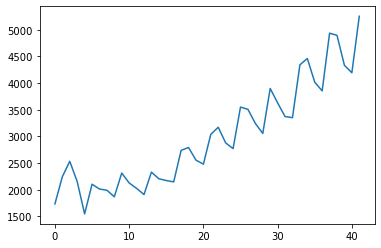

In [6]:
sales['Sales'].plot()
plt.show()

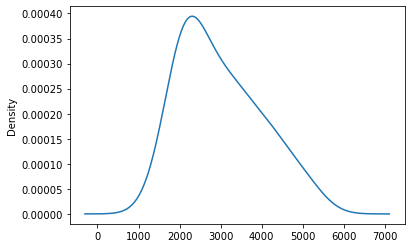

In [7]:
sales['Sales'].plot(kind = 'kde')
plt.show()

In [8]:
sales['Quarters'] = 0
sales['Year'] = 0
for i in range(sales.shape[0]):
    p = sales['Quarter'][i]
    sales['Quarters'][i] = p[0:2]
    sales['Year'][i] = p[3:5]


In [9]:
sales.head()

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


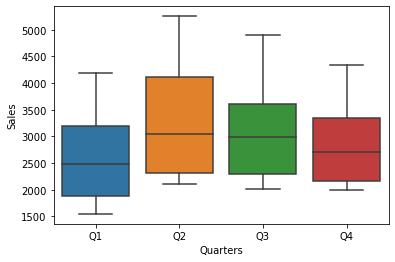

In [10]:
sns.boxplot(x='Quarters',y='Sales',data = sales)
plt.show()

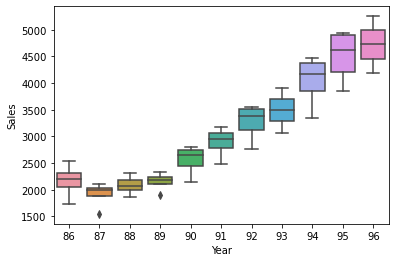

In [11]:
sns.boxplot(x='Year',y='Sales',data=sales)
plt.show()

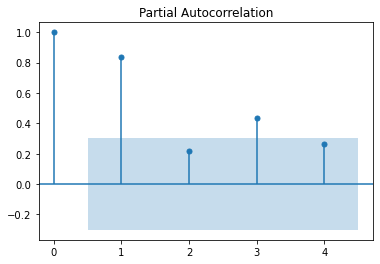

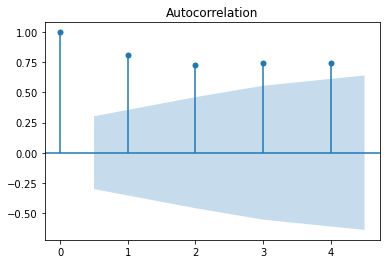

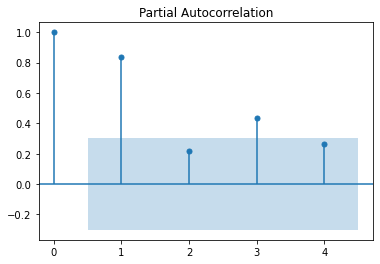

In [12]:
 tsa_plot.plot_acf(sales.Sales,lags=4)
tsa_plot.plot_pacf(sales.Sales,lags=4)

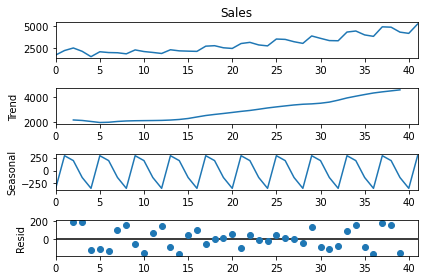

In [13]:
decompose_ts_add = seasonal_decompose(sales['Sales'],period=4)
decompose_ts_add.plot()
plt.show()

In [14]:
sales['t'] = pd.RangeIndex(start=0,stop=42,step=1)
sales['sq_t'] = np.square(sales['t'])
sales['log_sale'] = np.log(sales['Sales'])
sales = pd.get_dummies(data=sales,columns=['Quarters'])
sales

,Quarter,Sales,Year,t,sq_t,log_sale,Quarters_Q1,Quarters_Q2,Quarters_Q3,Quarters_Q4
0,Q1_86,1734.827000,86,0,0,7.458663,1,0,0,0
1,Q2_86,2244.960999,86,1,1,7.716443,0,1,0,0
2,Q3_86,2533.804993,86,2,4,7.837477,0,0,1,0
3,Q4_86,2154.962997,86,3,9,7.675529,0,0,0,1
4,Q1_87,1547.818996,87,4,16,7.344602,1,0,0,0
5,Q2_87,2104.411995,87,5,25,7.651791,0,1,0,0
6,Q3_87,2014.362999,87,6,36,7.608058,0,0,1,0
7,Q4_87,1991.746998,87,7,49,7.596767,0,0,0,1
8,Q1_88,1869.049999,88,8,64,7.533186,1,0,0,0
9,Q2_88,2313.631996,88,9,81,7.746574,0,1,0,0


In [15]:
train = sales.head(30)
test = sales.head(12)

In [16]:
linear_model = smf.ols('Sales~t',data=train).fit()
linear_pred=linear_model.predict(train['t'])
linear_rms=mean_absolute_error(train['Sales'],linear_pred)
linear_rms

257.4609816851609

In [17]:
Exp = smf.ols('log_sale~t',data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(train['t'])))
rmse_Exp = mean_absolute_error(train['Sales'],pred_Exp)
rmse_Exp

2496.3274984983696

In [18]:
quad = smf.ols('Sales~t+sq_t',data=train).fit()
pred_quad = pd.Series(quad.predict(train[["t","sq_t"]]))
rmse_quad = mean_absolute_error(train['Sales'],pred_quad)
rmse_quad

213.1674920230563

In [19]:
add_sea = smf.ols('Sales~Quarters_Q1+Quarters_Q2+Quarters_Q3+Quarters_Q4',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(train[['Quarters_Q1','Quarters_Q2','Quarters_Q3','Quarters_Q4']]))
rmse_add_sea = mean_absolute_error(train['Sales'],pred_add_sea)
rmse_add_sea

458.8212516375952

In [20]:
add_sea_quad = smf.ols('Sales~t+sq_t+Quarters_Q1+Quarters_Q2+Quarters_Q3+Quarters_Q4',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_quad.predict(train[['Quarters_Q1','Quarters_Q2','Quarters_Q3','Quarters_Q4','t','sq_t']]))
rmse_add_sea_quad = mean_absolute_error(train['Sales'],pred_add_sea_quad)
rmse_add_sea_quad


99.6906809254258

In [21]:
Mul_sea = smf.ols('log_sale~Quarters_Q1+Quarters_Q2+Quarters_Q3+Quarters_Q4',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(train[['Quarters_Q1','Quarters_Q2','Quarters_Q3','Quarters_Q4']]))
rmse_Mult_sea = mean_absolute_error(train['Sales'],pred_Mult_sea)
rmse_Mult_sea

2496.3274984983705

In [22]:
Mul_Add_sea = smf.ols('log_sale~t+Quarters_Q1+Quarters_Q2+Quarters_Q3+Quarters_Q4',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(train[['t','Quarters_Q1','Quarters_Q2','Quarters_Q3','Quarters_Q4']]))
rmse_Mult_add_sea = mean_absolute_error(train['Sales'],pred_Mult_add_sea)
rmse_Mult_add_sea

2496.32749849837

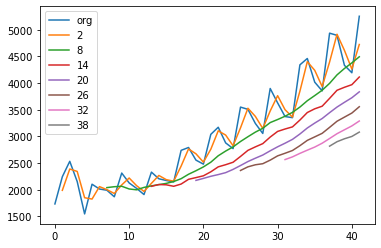

In [23]:
sales['Sales'].plot(label="org")
for i in range(2,43,6):
    sales['Sales'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')


In [24]:
ses_model = SimpleExpSmoothing(train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = train.index[0],end = train.index[-1])
ses_rms=mean_absolute_error(pred_ses,train['Sales']) 
ses_rms

284.2917972891417

In [25]:
hw_model = Holt(train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2) # two levels of smoothening
pred_hw = hw_model.predict(start = train.index[0],end = train.index[-1])
hw_rms=mean_absolute_error(pred_hw,train['Sales'])
hw_rms

299.1739190601294

In [26]:
hwe_model_mul_add = ExponentialSmoothing(train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = train.index[0],end = train.index[-1])
hw_ma_rms=mean_absolute_error(pred_hwe_mul_add,train['Sales'])
hw_ma_rms

135.04522238207971

In [27]:
hwe_model_mul_add = ExponentialSmoothing(train["Sales"],seasonal="add",trend="mul",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = train.index[0],end = train.index[-1])
hw_ma_rms=mean_absolute_error(pred_hwe_mul_add,train['Sales']) 
hw_ma_rms

133.04944901711417

In [28]:
hwe_model_add_add = ExponentialSmoothing(train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() 
pred_hwe_add_add = hwe_model_add_add.predict(start = train.index[0],end = train.index[-1])
hw_aa_rms=mean_absolute_error(pred_hwe_add_add,train['Sales']) 
hw_aa_rms


129.46982526440985

In [29]:
ARMAmodel = ARMA(train['Sales'], order=(3, 0)) #model with AR=1 and MA=0
ARMAmodel_fit = ARMAmodel.fit()
ARMA_pred = ARMAmodel_fit.predict()
ARMA_pred
arma_rms=mean_absolute_error(ARMA_pred,train['Sales'])
arma_rms

277.1874771729836

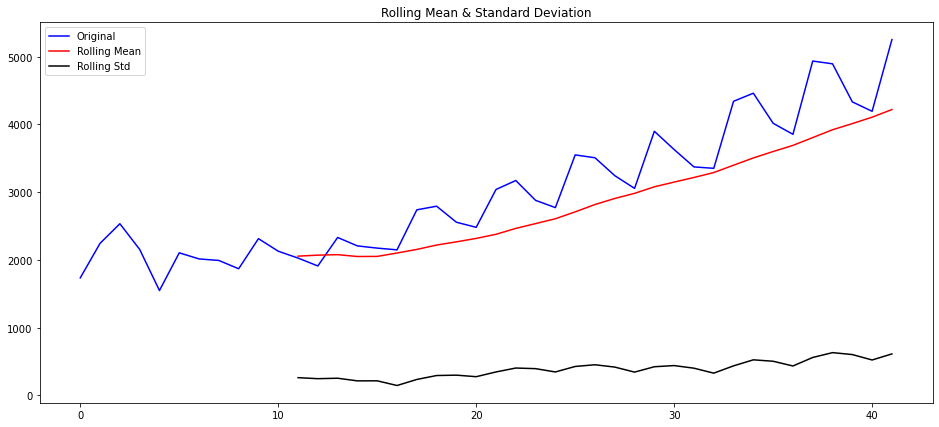

In [30]:
rolLmean = sales['Sales'].rolling(12).mean() # 12 entries
rolLstd = sales['Sales'].rolling(12).std()
plt.figure(figsize=(16,7))
fig = plt.figure(1)

orig = plt.plot(sales['Sales'], color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [31]:
add_sea_quad = smf.ols('Sales~t+sq_t+Quarters_Q1+Quarters_Q2+Quarters_Q3+Quarters_Q4',data=train).fit()
pred_add_sea_quad = add_sea_quad.predict(test[['Quarters_Q1','Quarters_Q2','Quarters_Q3','Quarters_Q4','t','sq_t']])
rmse_add_sea_quad = mean_absolute_error(test['Sales'],pred_add_sea_quad)
rmse_add_sea_quad

119.5604671107112